# CHT2/23/DSA/0107

# ALHERI YUSUF MIDALA

# K Nearest Neighbors Project 

Welcome to the KNN Project! This will be a simple project very similar to the lecture, except you'll be given another data set. Go ahead and just follow the directions below.
## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [2]:
df= pd.read_csv('Classified Data.octet-stream')

**Check the head of the dataframe.**

In [3]:
df.head()

Unnamed: 0       WTT       PTI       EQW       SBI       LQE       QWG  \
0           0  0.913917  1.162073  0.567946  0.755464  0.780862  0.352608   
1           1  0.635632  1.003722  0.535342  0.825645  0.924109  0.648450   
2           2  0.721360  1.201493  0.921990  0.855595  1.526629  0.720781   
3           3  1.234204  1.386726  0.653046  0.825624  1.142504  0.875128   
4           4  1.279491  0.949750  0.627280  0.668976  1.232537  0.703727   

        FDJ       PJF       HQE       NXJ  TARGET CLASS  
0  0.759697  0.643798  0.879422  1.231409             1  
1  0.675334  1.013546  0.621552  1.492702             0  
2  1.626351  1.154483  0.957877  1.285597             0  
3  1.409708  1.380003  1.522692  1.153093             1  
4  1.115596  0.646691  1.463812  1.419167             1

# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

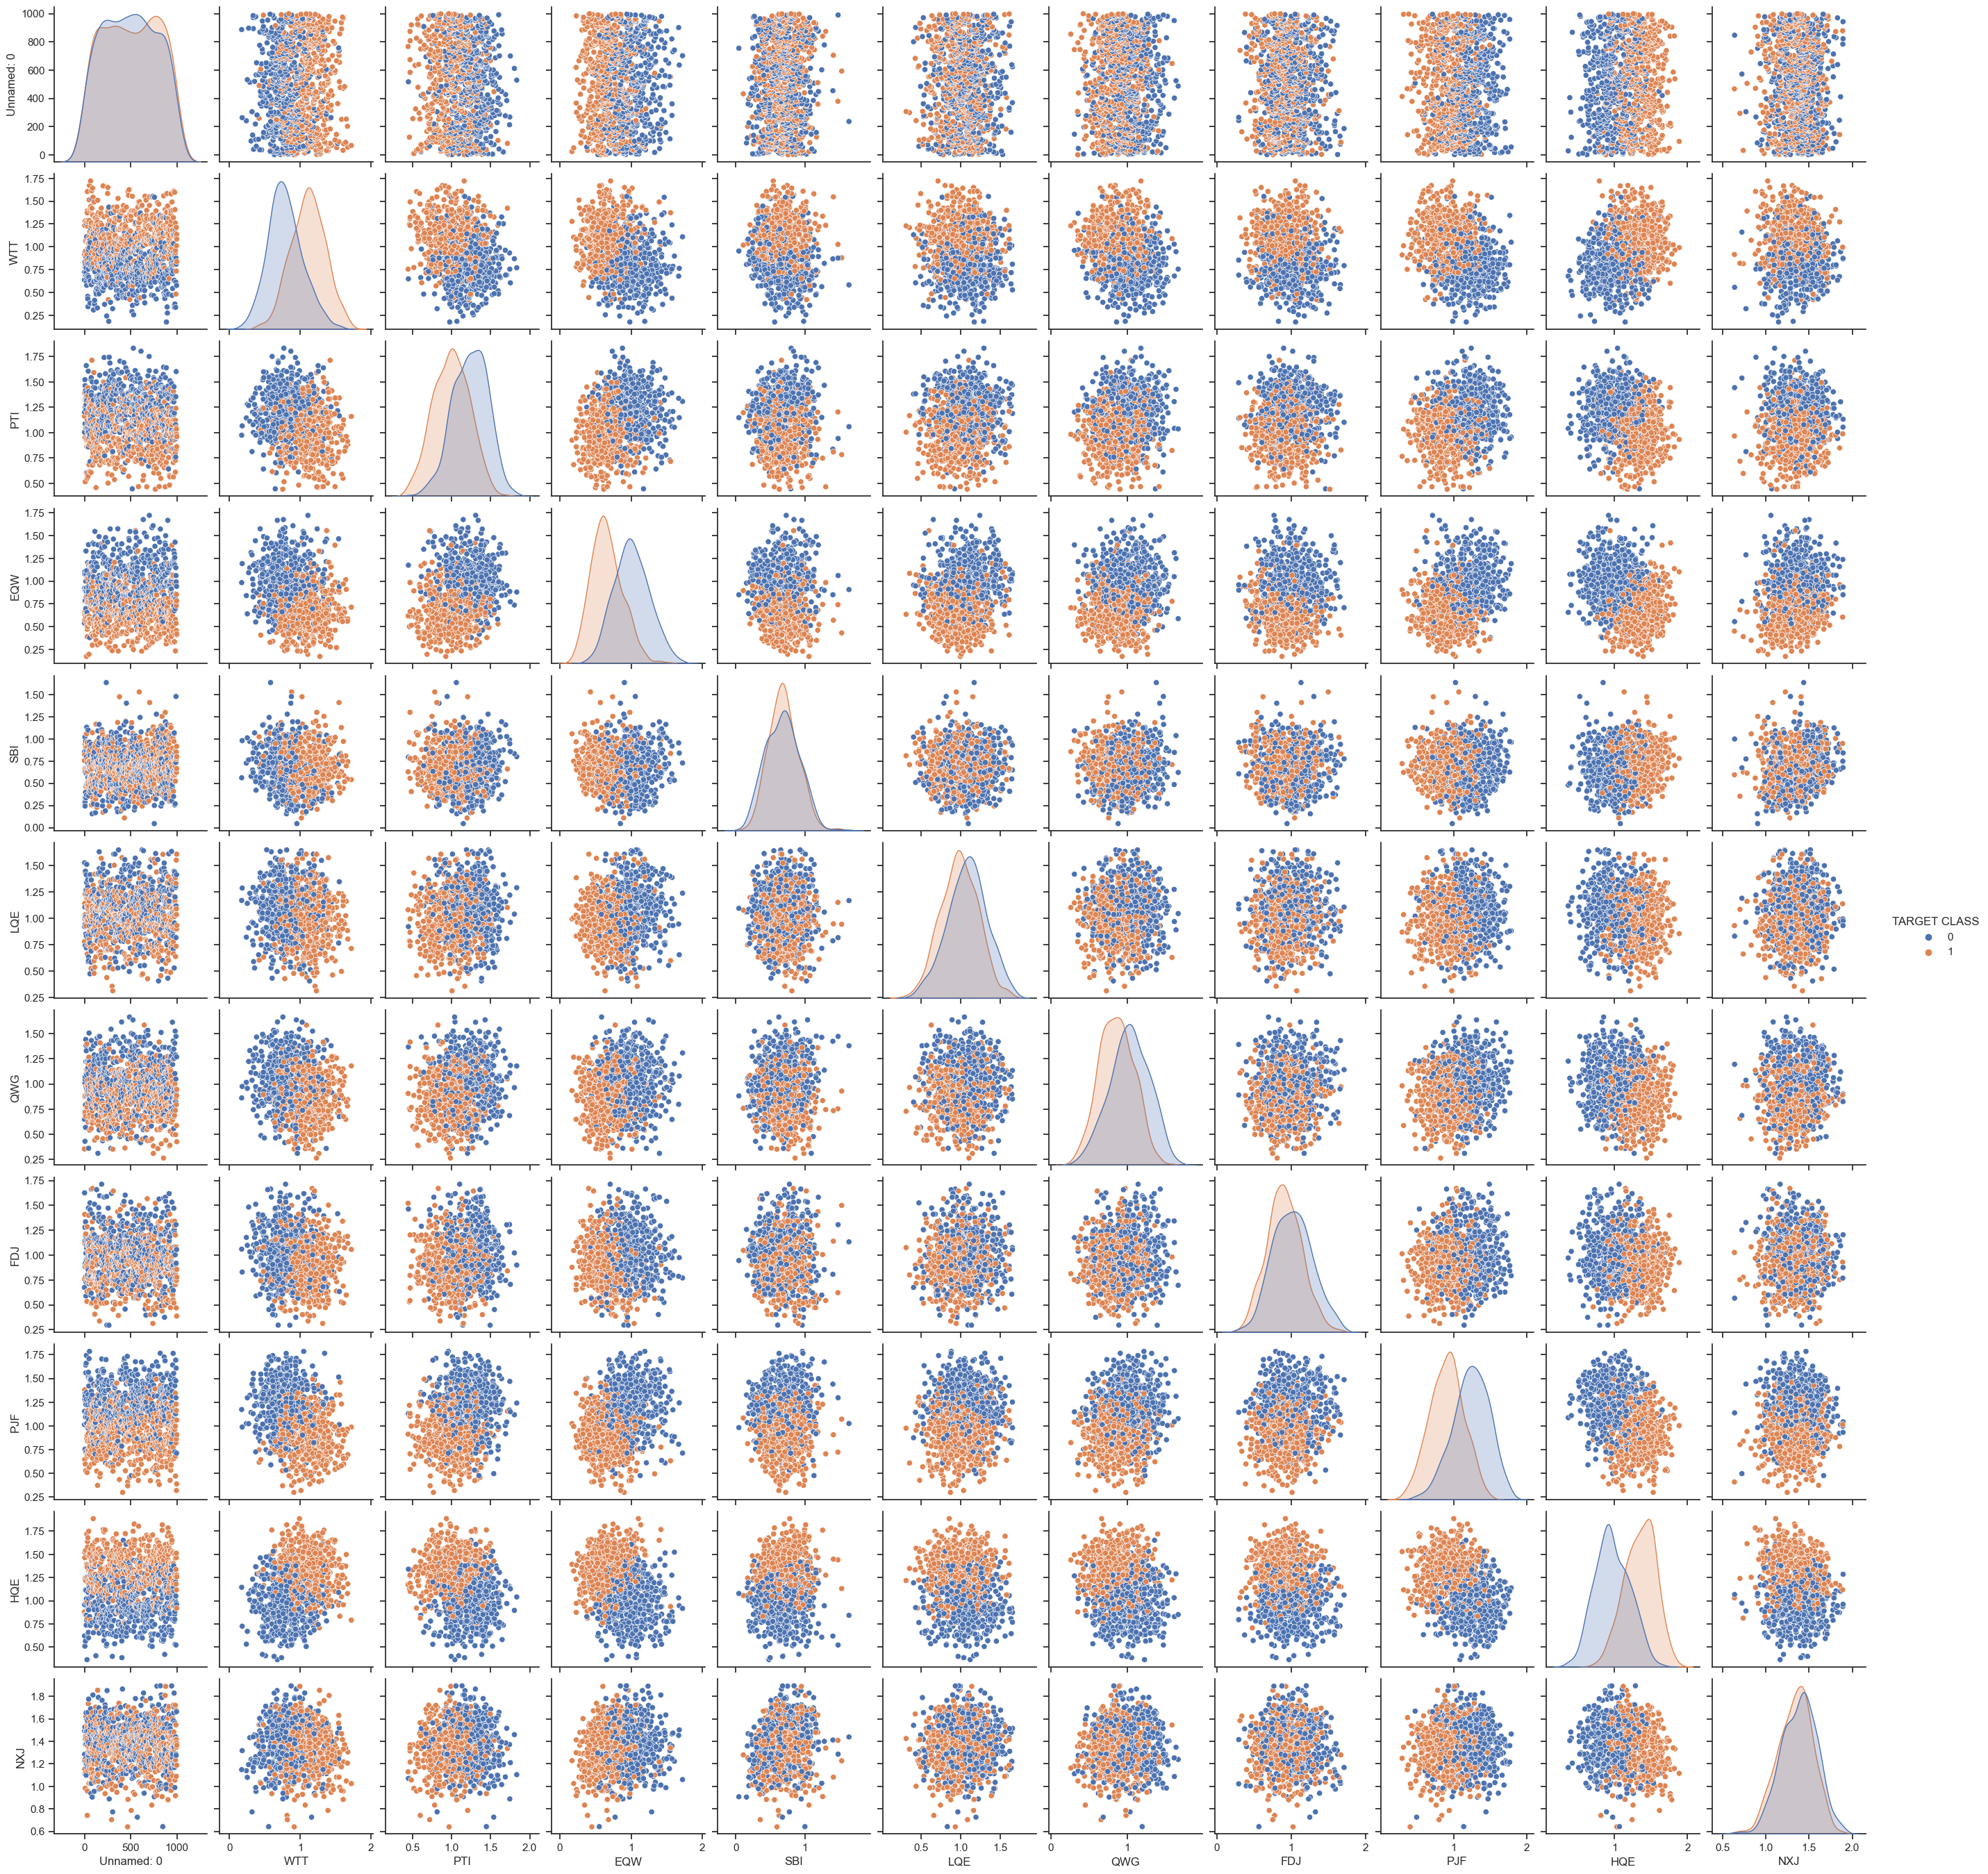

In [4]:
sns.set(style="ticks")
sns.pairplot(df, hue="TARGET CLASS")

# Standardize the Variables

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

In [6]:
from sklearn.preprocessing import StandardScaler

** Create a StandardScaler() object called scaler.**

In [7]:
scaler = StandardScaler()

** Fit scaler to the features.**

In [8]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

**Use the .transform() method to transform the features to a scaled version.**

In [9]:
scaled = scaler.transform(df.drop('TARGET CLASS',axis=1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [11]:
scaled_df = pd.DataFrame(scaled, columns=df.columns[:-1])
scaled_df.head()

Unnamed: 0       WTT       PTI       EQW       SBI       LQE       QWG  \
0   -1.730320 -0.123542  0.185907 -0.913431  0.319629 -1.033637 -2.308375   
1   -1.726856 -1.084836 -0.430348 -1.025313  0.625388 -0.444847 -1.152706   
2   -1.723391 -0.788702  0.339318  0.301511  0.755873  2.031693 -0.870156   
3   -1.719927  0.982841  1.060193 -0.621399  0.625299  0.452820 -0.267220   
4   -1.716463  1.139275 -0.640392 -0.709819 -0.057175  0.822886 -0.936773   

        FDJ       PJF       HQE       NXJ  
0 -0.798951 -1.482368 -0.949719 -0.643314  
1 -1.129797 -0.202240 -1.828051  0.636759  
2  2.599818  0.285707 -0.682494 -0.377850  
3  1.750208  1.066491  1.241325 -1.026987  
4  0.596782 -1.472352  1.040772  0.276510

# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [12]:
from sklearn.model_selection import train_test_split

In [15]:
x = scaled_df
y = df['TARGET CLASS']
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25, random_state = 42)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [20]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [40]:
model = KNeighborsClassifier(n_neighbors=5)

**Fit this KNN model to the training data.**

In [41]:
model.fit(x_train,y_train)

KNeighborsClassifier()

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [42]:
y_pred = model.predict(x_test)

** Create a confusion matrix and classification report.**

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

In [43]:
confusion_mtx = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mtx)

Confusion Matrix:
[[110   6]
 [  6 128]]


In [44]:
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       116
           1       0.96      0.96      0.96       134

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [45]:
error_rates = []
for k in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    error_rate = sum(y_pred != y_test) / len(y_test)
    error_rates.append(error_rate)

**Now create the following plot using the information from your for loop.**

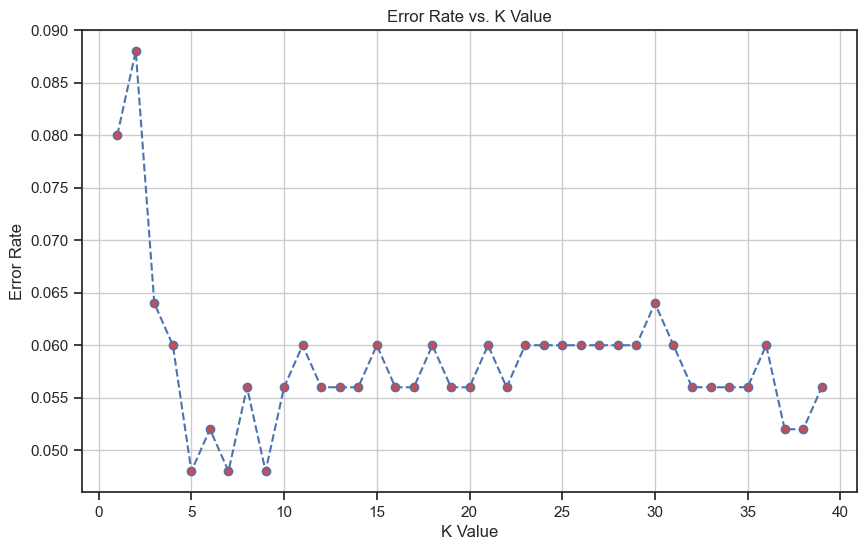

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rates, marker='o', linestyle='--', color='b', markerfacecolor='r')
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.grid()

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [47]:
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(x_train,y_train)
y2_pred = model.predict(x_test)

confusion_mtx = confusion_matrix(y_test, y2_pred)
print("Confusion Matrix:")
print(confusion_mtx)


class_report = classification_report(y_test, y2_pred)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[110   6]
 [  6 128]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       116
           1       0.96      0.96      0.96       134

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250



# Great Job!